### 1. Import

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

random_state = 42
#from train_test_split import *

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from time import sleep

from sklearn.preprocessing import OrdinalEncoder



### 2. Splitting the train data into different sets & saving them into different csv

In [76]:
'''
import os 

def load_dataset(csv_path):
    open_dataset = pd.read_csv(csv_path)
    return open_dataset

def split_data(data,validation_ratio,test_ratio):
    shuffle_rows = np.random.permutation(len(data))
    validation_set_size = int(len(data)*validation_ratio)                   # the resulting answer is in float, to avoid decimals and dividing the data problems, int is applied
    validation_indices = shuffle_rows[:validation_set_size]
    test_set_size = int(len(data)*test_ratio)                               # the resulting answer is in float, to avoid decimals and dividing the data problems, int is applied
    test_indices = shuffle_rows[validation_set_size:test_set_size+validation_set_size]
    train_indices =shuffle_rows[test_set_size:]
    train_set = data.iloc[train_indices]
    validation_set = data.iloc[validation_indices]
    test_set = data.iloc[test_indices]
    return train_set,validation_set,test_set

def make_folders(path_train,path_validation,path_test):
    if os.path.exists(path_train) or os.path.exists(path_validation) or os.path.exists(path_test):
        pass
    else:
        return os.makedirs(path_train),os.makedirs(path_validation),os.makedirs(path_test)

def write_csv(name_train,name_validation,name_test):  
    train_set_csv = train_set.to_csv(name_train,index=False)
    validation_set_csv = validation_set.to_csv(name_validation,index=False)
    test_set_csv = test_set.to_csv(name_test,index=False)
    return train_set_csv,validation_set_csv,test_set_csv


train_set,validation_set,test_set=split_data(load_dataset('train.csv'),validation_ratio=0.1,test_ratio=0.2)

make_folders(path_train=r'./train',path_validation=r'./validation',path_test=r'./test')
sleep(5)
write_csv(name_train='./train/train.csv',name_validation='./validation/validation.csv',name_test='./test/test.csv');
'''

"\nimport os \n\ndef load_dataset(csv_path):\n    open_dataset = pd.read_csv(csv_path)\n    return open_dataset\n\ndef split_data(data,validation_ratio,test_ratio):\n    shuffle_rows = np.random.permutation(len(data))\n    validation_set_size = int(len(data)*validation_ratio)                   # the resulting answer is in float, to avoid decimals and dividing the data problems, int is applied\n    validation_indices = shuffle_rows[:validation_set_size]\n    test_set_size = int(len(data)*test_ratio)                               # the resulting answer is in float, to avoid decimals and dividing the data problems, int is applied\n    test_indices = shuffle_rows[validation_set_size:test_set_size+validation_set_size]\n    train_indices =shuffle_rows[test_set_size:]\n    train_set = data.iloc[train_indices]\n    validation_set = data.iloc[validation_indices]\n    test_set = data.iloc[test_indices]\n    return train_set,validation_set,test_set\n\ndef make_folders(path_train,path_validation,p

### 3. Loading the datasets 

In [77]:
def load_data(path):

    return pd.read_csv(path,index_col='row_id')

train = load_data('train.csv').copy()

test = load_data('test.csv').copy()

In [78]:
train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000115,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae


In [79]:
test

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-9.536743e-07,-0.000008,-4.291534e-05,-0.000108,-0.000194,-0.000234,-0.000195,-0.000110,-0.000043,-0.000010,...,0.000159,0.000559,0.000489,0.000499,0.000899,0.000443,0.000047,0.000148,0.000101,4.046326e-06
299996,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
299997,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


### 4. Checking the info and null values

In [80]:
def check_info(dataset):
    return dataset.info()

In [81]:
print(check_info(train))
print(check_info(test))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 439.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 200000 to 299999
Columns: 286 entries, A0T0G0C10 to A10T0G0C0
dtypes: float64(286)
memory usage: 219.0 MB
None


In [82]:
def check_null_values(dataset):
    return dataset.isnull().sum()

In [83]:
print(check_null_values(train))
print(check_null_values(test))

A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
A0T0G4C6     0
            ..
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
target       0
Length: 287, dtype: int64
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
A0T0G4C6     0
            ..
A8T2G0C0     0
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
Length: 286, dtype: int64


### 5. Converting the categorical variables into numerical variables and adding an additional column for the train set

In [84]:
ordinal_encoder = OrdinalEncoder(dtype=int)
train["target_code"] = ordinal_encoder.fit_transform(train[["target"]])
train[["target", "target_code"]]

,target,target_code
row_id,,
0,Streptococcus_pyogenes,9
1,Salmonella_enterica,6
2,Salmonella_enterica,6
3,Salmonella_enterica,6
4,Enterococcus_hirae,2
...,...,...
199995,Salmonella_enterica,6
199996,Streptococcus_pyogenes,9
199997,Streptococcus_pneumoniae,8


In [85]:
train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica,6
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae,8


### 6. Selecting the targets and features from train set (original data from kaggle)

In [86]:
def select_target(df):
    return df['target_code']

def select_features(df):
    drop_target = df.drop('target',axis=1)
    drop_both = drop_target.drop('target_code',axis=1)
    return drop_both

In [87]:
X_train = select_features(train)
y_train = select_target(train)

### 7. Applying ExtraTrees Classifier Method to select the features
- Cannot apply Correlation because of too many features.
- Cannot apply Univariate Selection because of neagtive values inside the train data.

In [88]:
def select_bestfeatures(trainset,testset):
    model = ExtraTreesClassifier()
    return model.fit(trainset,testset)

select_best_features = select_bestfeatures(X_train,y_train)
select_best_features

ExtraTreesClassifier()

#### 7.1 Plotting the largest score value to select the features

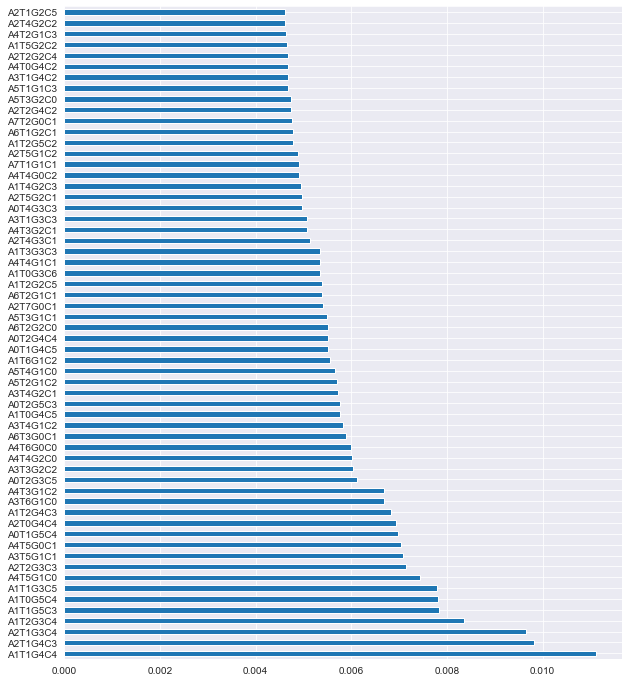

(Index(['A1T1G4C4', 'A2T1G4C3', 'A2T1G3C4', 'A1T2G3C4', 'A1T1G5C3', 'A1T0G5C4',
        'A1T1G3C5', 'A4T5G1C0', 'A2T2G3C3', 'A3T5G1C1', 'A4T5G0C1', 'A0T1G5C4',
        'A2T0G4C4', 'A1T2G4C3', 'A3T6G1C0', 'A4T3G1C2', 'A0T2G3C5', 'A3T3G2C2',
        'A4T4G2C0', 'A4T6G0C0', 'A6T3G0C1', 'A3T4G1C2', 'A1T0G4C5', 'A0T2G5C3',
        'A3T4G2C1', 'A5T2G1C2', 'A5T4G1C0', 'A1T6G1C2', 'A0T1G4C5', 'A0T2G4C4',
        'A6T2G2C0', 'A5T3G1C1', 'A2T7G0C1', 'A6T2G1C1', 'A1T2G2C5', 'A1T0G3C6',
        'A4T4G1C1', 'A1T3G3C3', 'A2T4G3C1', 'A4T3G2C1', 'A3T1G3C3', 'A0T4G3C3',
        'A2T5G2C1', 'A1T4G2C3', 'A4T4G0C2', 'A7T1G1C1', 'A2T5G1C2', 'A1T2G5C2',
        'A6T1G2C1', 'A7T2G0C1', 'A2T2G4C2', 'A5T3G2C0', 'A5T1G1C3', 'A3T1G4C2',
        'A4T0G4C2', 'A2T2G2C4', 'A1T5G2C2', 'A4T2G1C3', 'A2T4G2C2', 'A2T1G2C5'],
       dtype='object'),
 None)

In [89]:
'''
for i in range(20,101,10):
    plt.figure(figsize=(10,8))
    feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
    feat_importances.nlargest(i).plot(kind='bar')

    plt.show()
    print(i,":", feat_importances.nlargest(i).index)
'''

def features_scores(features_tobe_selected,best_features, dataset):
    feat_importances = pd.Series(best_features.feature_importances_,index=dataset.columns)
    return feat_importances.nlargest(features_tobe_selected)

feat = features_scores(60,select_best_features,X_train)

def plot_features_scores(features_tobe_selected):   
    plt.figure(figsize=(10,12))
    feat.nlargest(features_tobe_selected).plot(kind='barh')
    plt.show()


feat.index, plot_features_scores(60)

#### 7.2 Plotting the Boxplot Diagramm to remove outliers

In [90]:
# boxplot_data = X_train.copy()

# selected_features = ['A1T2G4C3', 'A1T1G4C4', 'A1T2G3C4', 'A2T1G4C3', 'A3T5G1C1', 'A1T0G5C4',
#        'A1T1G5C3', 'A4T4G2C0', 'A2T1G3C4', 'A1T2G2C5', 'A1T1G3C5', 'A4T5G0C1',
#        'A3T4G1C2', 'A2T0G4C4', 'A4T5G1C0', 'A4T6G0C0', 'A2T2G3C3', 'A0T1G5C4',
#        'A2T0G5C3', 'A6T3G0C1', 'A1T0G4C5', 'A5T2G1C2', 'A0T2G3C5', 'A2T1G5C2',
#        'A0T1G4C5', 'A3T5G2C0', 'A4T3G1C2', 'A6T2G1C1', 'A6T1G2C1', 'A1T2G5C2',
#        'A1T3G3C3', 'A3T6G1C0', 'A4T4G0C2', 'A3T4G2C1', 'A4T2G1C3', 'A3T6G0C1',
#        'A1T0G3C6', 'A7T1G1C1', 'A0T2G4C4', 'A3T3G2C2', 'A5T4G1C0', 'A4T2G2C2',
#        'A0T0G5C5', 'A3T1G2C4', 'A7T2G1C0', 'A3T5G0C2', 'A2T7G0C1', 'A1T1G2C6',
#        'A5T1G1C3', 'A2T4G2C2', 'A6T2G2C0', 'A4T4G1C1', 'A0T1G6C3', 'A0T2G5C3',
#        'A6T4G0C0', 'A0T1G3C6', 'A1T6G1C2', 'A4T3G2C1', 'A1T4G2C3', 'A2T2G2C4']


# boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# boxplot_data.boxplot(column=selected_features)
# plt.ylabel(selected_features)
# plt.title(selected_features)
# plt.show()
# '''
# for feature in selected_features:
#        # boxplot_data[feature]=np.log(boxplot_data[feature])
#        original_train_data.boxplot(column=feature)
#        plt.ylabel(feature)
#        plt.title(feature)
#        plt.show()
# '''

#### 7.3 Removing Outliers from the Boxplot

In [91]:
# boxplot_data = X_train.copy()

# selected_features = ['A1T2G4C3', 'A1T1G4C4', 'A1T2G3C4', 'A2T1G4C3', 'A3T5G1C1', 'A1T0G5C4',
#        'A1T1G5C3', 'A4T4G2C0', 'A2T1G3C4', 'A1T2G2C5', 'A1T1G3C5', 'A4T5G0C1',
#        'A3T4G1C2', 'A2T0G4C4', 'A4T5G1C0', 'A4T6G0C0', 'A2T2G3C3', 'A0T1G5C4',
#        'A2T0G5C3', 'A6T3G0C1', 'A1T0G4C5', 'A5T2G1C2', 'A0T2G3C5', 'A2T1G5C2',
#        'A0T1G4C5', 'A3T5G2C0', 'A4T3G1C2', 'A6T2G1C1', 'A6T1G2C1', 'A1T2G5C2',
#        'A1T3G3C3', 'A3T6G1C0', 'A4T4G0C2', 'A3T4G2C1', 'A4T2G1C3', 'A3T6G0C1',
#        'A1T0G3C6', 'A7T1G1C1', 'A0T2G4C4', 'A3T3G2C2', 'A5T4G1C0', 'A4T2G2C2',
#        'A0T0G5C5', 'A3T1G2C4', 'A7T2G1C0', 'A3T5G0C2', 'A2T7G0C1', 'A1T1G2C6',
#        'A5T1G1C3', 'A2T4G2C2', 'A6T2G2C0', 'A4T4G1C1', 'A0T1G6C3', 'A0T2G5C3',
#        'A6T4G0C0', 'A0T1G3C6', 'A1T6G1C2', 'A4T3G2C1', 'A1T4G2C3', 'A2T2G2C4']

features_tbs = features_scores(60,select_best_features,X_train).index

# # boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# # boxplot_data.boxplot(column=selected_features)
# # plt.ylabel(selected_features)
# # plt.title(selected_features)
# # plt.show()
# '''
# for feature in features_tbs:
    
#     q1 = dataset_train[feature].quantile(0.25)
#     q3 = dataset_train[feature].quantile(0.75)
#     IQR = q3-q1
#     lower_extreme = q1 - 1.5*IQR
#     upper_extreme = q3 + 1.5*IQR

#     out1 = dataset_train[(dataset_train[feature]<lower_extreme)].index
#     out2 = dataset_train[(dataset_train[feature]>upper_extreme)].index

#     dataset_train.drop(out1,inplace=True)
#     dataset_train.drop(out2,inplace=True)
# '''

    # dataset_train[feature].replace(out1,mean,inplace=True)
    # dataset_train[feature].replace(out2,mean,inplace=True)
    
    #boxplot_data[feature]=np.log(boxplot_data[feature])

# '''
#     original_train_data.boxplot(column=feature)
#     plt.ylabel(feature)
#     plt.title(feature)
#     plt.show()
# '''

### 8. Modified Dataset (selecting the best features along with target variables)

In [92]:
def modified_dataset(dataset):
    selected_columns = features_tbs
    df = pd.DataFrame(dataset,columns=selected_columns)
    df['target'] = dataset['target']
    df['target_code'] = dataset['target_code']
    return df
    
df_train = modified_dataset(train)
df_train

,A1T1G4C4,A2T1G4C3,A2T1G3C4,A1T2G3C4,A1T1G5C3,A1T0G5C4,A1T1G3C5,A4T5G1C0,A2T2G3C3,A3T5G1C1,...,A5T1G1C3,A3T1G4C2,A4T0G4C2,A2T2G2C4,A1T5G2C2,A4T2G1C3,A2T4G2C2,A2T1G2C5,target,target_code
row_id,,,,,,,,,,,,,,,,,,,,,
0,-0.006008,-0.002016,-0.012016,-0.002016,-0.004807,-0.001202,-0.004807,-0.001202,-0.014033,-0.004807,...,-0.004807,-0.012016,-0.003004,0.011976,0.002790,-0.012016,0.001976,-0.007210,Streptococcus_pyogenes,9
1,-0.003008,-0.000016,-0.002016,-0.002016,0.003193,0.000798,0.002193,-0.001202,-0.001033,0.000193,...,0.001193,-0.003016,-0.003004,0.007976,-0.002210,-0.002016,0.002976,-0.000210,Salmonella_enterica,6
2,0.002327,0.001407,0.002056,0.001672,0.001573,0.000892,0.001650,0.000168,0.000122,-0.000030,...,-0.000126,0.000231,0.000202,-0.000100,0.000131,-0.001122,-0.001513,0.000774,Salmonella_enterica,6
3,0.004602,0.003440,0.003620,0.003456,0.003092,0.001725,0.003112,0.000230,0.000439,-0.000134,...,-0.000115,0.000323,0.000445,-0.000150,0.000198,-0.002322,-0.002776,0.001525,Salmonella_enterica,6
4,-0.006008,-0.012016,-0.012016,-0.012016,-0.004807,-0.001202,-0.004807,0.008798,-0.024033,-0.004807,...,-0.004807,-0.012016,-0.003004,-0.018024,-0.007210,-0.002016,0.001976,-0.007210,Enterococcus_hirae,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.003072,0.002664,0.002924,0.002854,0.002303,0.001348,0.002193,0.000248,0.000247,0.000273,...,0.000403,0.000224,0.000296,-0.000214,0.000230,-0.002036,-0.002524,0.000420,Salmonella_enterica,6
199996,-0.004008,-0.002016,-0.006016,-0.008016,-0.000807,-0.001202,0.000193,-0.000202,-0.009033,0.003193,...,0.002193,-0.003016,-0.002004,0.006976,-0.003210,-0.003016,0.004976,-0.003210,Streptococcus_pyogenes,9
199997,-0.001189,-0.002240,-0.001980,-0.002051,-0.001005,-0.000254,-0.000948,0.000522,-0.003222,0.001334,...,0.000508,-0.001400,-0.000325,-0.002020,0.000606,0.000372,0.000300,-0.001182,Streptococcus_pneumoniae,8


### 9. Selection of best features (seperation of target and target_code)

In [93]:
def X_features(df):
    drop_target = df.drop('target',axis=1)
    drop_both = drop_target.drop('target_code',axis=1)
    return drop_both

In [94]:
def y_target(df):
    return df['target_code']

In [95]:
X_tfeatures = X_features(df_train).values

In [96]:
y_ttarget = y_target(df_train).values

In [97]:
y_ttarget.shape

(200000,)

### 10. Standardisation

In [98]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_tfeatures_scaled = standard_scaler.fit_transform(X_tfeatures)


### 11. Applying RandomForest as the best classifier

In [99]:
def classifier(ft,tgt):
    best_model = RandomForestClassifier(n_estimators=100)
    return best_model.fit(ft,tgt)

clf = classifier(X_tfeatures_scaled,y_ttarget)

### 12. Modifying the dataframe of Test Dataset

In [100]:
def modified_test_dataset(test_dataset,column):
    df = pd.DataFrame(test_dataset,columns=column)
    return df

In [101]:
df_test = modified_test_dataset(test,features_tbs)
df_test

,A1T1G4C4,A2T1G4C3,A2T1G3C4,A1T2G3C4,A1T1G5C3,A1T0G5C4,A1T1G3C5,A4T5G1C0,A2T2G3C3,A3T5G1C1,...,A2T2G4C2,A5T3G2C0,A5T1G1C3,A3T1G4C2,A4T0G4C2,A2T2G2C4,A1T5G2C2,A4T2G1C3,A2T4G2C2,A2T1G2C5
row_id,,,,,,,,,,,,,,,,,,,,,
200000,0.000505,0.000237,0.000703,0.000379,0.000449,0.000091,0.000362,0.000132,-0.000510,0.000088,...,-0.000272,0.000105,0.000348,-0.000193,0.000051,-0.000275,0.000549,-0.000561,-0.000740,0.000172
200001,0.001992,0.004984,-0.001016,0.001984,0.005193,-0.001202,0.005193,-0.000202,-0.004033,-0.001807,...,-0.000024,0.000597,-0.001807,-0.002016,-0.001004,-0.001024,-0.001210,-0.004016,0.001976,-0.003210
200002,-0.000490,-0.001093,-0.000923,-0.000857,-0.000463,-0.000113,-0.000321,0.000270,-0.001519,0.000836,...,-0.000924,0.000423,0.000295,-0.000774,-0.000195,-0.001019,0.000342,0.000083,0.000035,-0.000468
200003,0.004536,0.003283,0.003608,0.003399,0.002900,0.001705,0.003039,0.000259,0.000343,-0.000102,...,-0.000306,-0.000026,-0.000134,0.000426,0.000422,-0.000419,0.000343,-0.002177,-0.002709,0.001180
200004,-0.006008,-0.005016,-0.010016,-0.012016,-0.003807,-0.001202,-0.001807,0.005798,-0.014033,0.008193,...,-0.009024,0.009597,0.001193,-0.007016,-0.003004,-0.007024,-0.001210,-0.000016,-0.005024,-0.003210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.005312,-0.008882,-0.008801,-0.008903,-0.004235,-0.001153,-0.004262,0.002426,-0.013082,0.005675,...,-0.009307,0.003972,0.002319,-0.005547,-0.001044,-0.009278,0.003084,0.001800,0.002133,-0.005097
299996,-0.006008,-0.002016,-0.012016,-0.012016,-0.004807,-0.001202,-0.004807,-0.001202,-0.014033,-0.004807,...,0.021976,-0.002403,0.005193,-0.012016,-0.003004,0.011976,-0.007210,-0.012016,0.001976,-0.007210
299997,-0.002008,-0.001016,-0.006016,-0.003016,0.001193,-0.001202,0.002193,-0.001202,-0.001033,0.001193,...,0.002976,0.001597,0.001193,0.000984,-0.002004,0.003976,-0.004210,-0.001016,0.003976,-0.003210


### 13. Making Predictions

In [102]:
test_scaled = standard_scaler.transform(df_test.values)

In [103]:
predictions_test = clf.predict(test_scaled)

### 14. Making Predictions into a Dataframe

In [104]:
df_test_target_code = pd.DataFrame(predictions_test,index=df_test.index)
df_test_target_code = df_test_target_code.set_axis(['target_code'],axis=1)

In [105]:
df_test_target_code

,target_code
row_id,
200000,4
200001,6
200002,2
200003,6
200004,7
...,...
299995,8
299996,0
299997,0


#### 14.1 Transforming the numerical back into categorical variables

In [106]:
df_test_target_code['target_code'] = pd.Categorical(df_test_target_code['target_code'])

In [107]:
df_test_target_code.dtypes

target_code    category
dtype: object

In [108]:
transormation_back = ordinal_encoder.inverse_transform(df_test_target_code)
transormation_back

array([['Escherichia_fergusonii'],
       ['Salmonella_enterica'],
       ['Enterococcus_hirae'],
       ...,
       ['Bacteroides_fragilis'],
       ['Bacteroides_fragilis'],
       ['Streptococcus_pyogenes']], dtype=object)

In [109]:
df_test_target = pd.DataFrame(transormation_back,index=df_test.index)
df_test_target = df_test_target.set_axis(['target'],axis=1)

In [110]:
df_test_target

,target
row_id,
200000,Escherichia_fergusonii
200001,Salmonella_enterica
200002,Enterococcus_hirae
200003,Salmonella_enterica
200004,Staphylococcus_aureus
...,...
299995,Streptococcus_pneumoniae
299996,Bacteroides_fragilis
299997,Bacteroides_fragilis


### 15. Saving the csv file as submission

In [111]:
df_test_target.to_csv('submission.csv')

In [112]:
df_test_target.value_counts()

target                  
Escherichia_fergusonii      11133
Salmonella_enterica         10611
Streptococcus_pneumoniae    10375
Streptococcus_pyogenes      10294
Bacteroides_fragilis        10259
Campylobacter_jejuni        10146
Staphylococcus_aureus       10127
Klebsiella_pneumoniae        9959
Enterococcus_hirae           8957
Escherichia_coli             8139
dtype: int64